In this exercise, we use C-SVMs to solve the **XOR**-classification problem.

### 1. 
First, **construct your data**:

#### a)
Create a training set of 80 points:

In the case of SVMs, binary labels are typically defined as \$y^T \in \${\$-1, +1$} instead of \$y^T \in \${\$0, 1\$}. Therefore, it might be beneficial to use the former and not the latter set.

#### b)
Create a hold-out set of 80 points from the same distribution.

### 2. 
Second, **the software**:

For constructing the C-SVM, you can use existing software that implements optimization routines for SVMs. Possible options include:
a) **libsvm1** for Matlab & Python

b) **scikit.learn** class that wraps around the above **libsvm** package for Python.

c) The package **e1071** implements SVM-optimization for **R**.

1. Download, install, and familiarize yourself with software package of your choice.

### 3. 
Third, **train your first classifier and evaluate it**:
1. Use your chosen SVM implementation to train a **C-SVM** with **RBF kernel** and the software’s standard parameters.

2. Classify the data from the hold-out set and report the percentage of wrong predictions.

### Deliverables:

3. Visualize the results, plot the training patterns and the decision boundary (e.g. with a contour plot) in input space.

4. Highlight the support vectors in the aforementioned visualization.

# Defining Function

In [165]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  
from sklearn import svm

def datasetCreation(n):
    variance = 0.1
    k = int(n/2)

    mean1 = np.asarray((0,1))
    mean2 = np.asarray((1,0))
    mean3 = np.asarray((0,0))
    mean4 = np.asarray((1,1))

    #Initializing conditional distributions (probability of X, given y=0 and probability of X, given y=1)
    p_XgivenY_0 = []
    p_XgivenY_1 = []

    #finding the covariance matrix
    co_variance = np.identity(2)*variance

    #creating 40 values using to different mean values
    for i in range(int(k)): 
        rnd = random.randint(0,1)
        if rnd == 0:
            p_XgivenY_0 = np.append(p_XgivenY_0, np.random.multivariate_normal(mean1, co_variance))
            p_XgivenY_1 = np.append(p_XgivenY_1, np.random.multivariate_normal(mean3, co_variance))
        elif rnd == 1:
            p_XgivenY_0 = np.append(p_XgivenY_0, np.random.multivariate_normal(mean2, co_variance))
            p_XgivenY_1 = np.append(p_XgivenY_1, np.random.multivariate_normal(mean4, co_variance))

    #reshaping the two conditional distributions (probability of X, given y=0 and probability of X, given y=1)
    p_XgivenY_0 = np.reshape(p_XgivenY_0, (k,2))
    p_XgivenY_1 = np.reshape(p_XgivenY_1, (k,2))

    # Extracting x1 and x2 values of conditional distributions points(80), we are adding them to dataframes to utize 
    #them in scatter plots.
    p_XgivenY_0_x1 = p_XgivenY_0[:,0]
    p_XgivenY_0_x2 = p_XgivenY_0[:,1]
    p_XgivenY_1_x1 = p_XgivenY_1[:,0]
    p_XgivenY_1_x2 = p_XgivenY_1[:,1]

    #setting y values for the above defined conditional distributions, zeros for the first 40 values and ones for the rest 
    #of the 40 values
    y_0 = np.ones(k)*(-1)
    y_1 = np.ones(k)

    #Formatting the x1,x2 and y values in such a way that they can be added to a dataframe
    data1 = {'x1': p_XgivenY_0_x1,'x2': p_XgivenY_0_x2, 'y':y_0}
    data2 = {'x1': p_XgivenY_1_x1, 'x2': p_XgivenY_1_x2, 'y':y_1}

    #Creating the training dataframe
    dfx = pd.DataFrame(data1)
    df_temp = pd.DataFrame(data2)
    dfx = dfx.append(df_temp,ignore_index=True)

    return dfx

def percentFailureAccuracy(y_true, y_pred):
    count = 0
    n = len(y_true)
    for i in range(n):
        if y_true[i] != y_pred[i]:
            count+=1
    return (count/n)*100

def percentSuccessAccuracy(y_true, y_pred):
    count = 0
    n = len(y_true)
    for i in range(n):
        if y_true[i] == y_pred[i]:
            count+=1
    return (count/n)*100

def decisionBoundry(X,y):
    # defining bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # defining the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # creating all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flattening each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # making predictions for the grid
    y_hat = rbf_svc_trainSet.predict(grid)
    # reshaping the predictions back into a grid
    zz = y_hat.reshape(xx.shape)
    # plotting the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')

# Plotting Training and Hold-Out sets

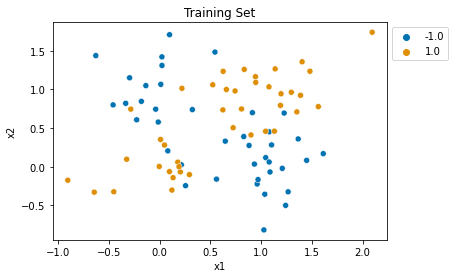

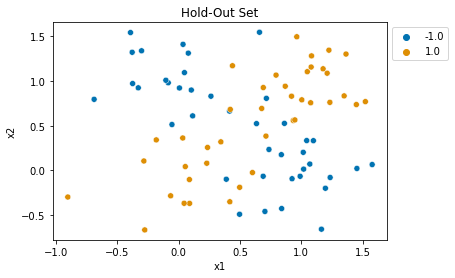

In [166]:
df_train = datasetCreation(80)
df_holdOut = datasetCreation(80)

sns.scatterplot(x ='x1', y= 'x2', data=df_train, hue='y', palette='colorblind')
plt.title("Training Set")
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()
sns.scatterplot(x ='x1', y= 'x2', data=df_holdOut, hue='y', palette='colorblind')
plt.title("Hold-Out Set")
plt.legend(loc = 2, bbox_to_anchor = (1,1))

# Exercise H9.2: C-SVM with standard parameters

## Training a C-SVM with RBF kernel. Also, classifying the data from the hold-out set and showing the percentage of wrong predictions.

In [167]:
#Getting training data, splitting into input and output sets, converting them into nd-array
X = np.asarray(df_train[['x1','x2']])
y = np.ravel(np.asarray(df_train[['y']]))

#Training the data using training set
rbf_svc_trainSet = svm.SVC(kernel='rbf')
#Fit the SVM model according to the given training dat
rbf_svc_trainSet.fit(X, y)

#Classification on Hold-Out set
y_pred_holdOut = rbf_svc_trainSet.predict(np.asarray(df_holdOut[['x1','x2']]))

# get number of support vectors for each class
support_vectors_count_trainSet = rbf_svc_trainSet.n_support_
print("Number of Support Vectors: ",support_vectors_count_trainSet)

#putting the y-values of hold-out set in an array to pass it to the function below
y_true_holdOut = np.ravel(np.asarray(df_holdOut[['y']]))

#Checking the perfromance of our classification, getting the failure percentage
classification_perf_holdOut_f = percentFailureAccuracy(y_true_holdOut, y_pred_holdOut)
print("Percentage of Incorrect Classifications on HoldOut set: {}%".format(classification_perf_holdOut_f))

#Checking the perfromance of our classification, getting the accuracy percentage
classification_perf_holdOut_s = percentSuccessAccuracy(y_true_holdOut, y_pred_holdOut)
print("Percentage of Classification Accuracy on HoldOut set: {}%".format(classification_perf_holdOut_s))

Number of Support Vectors:  [23 25]
Percentage of Incorrect Classifications on HoldOut set: 10.0%
Percentage of Classification Accuracy on HoldOut set: 90.0%


## Plotting the training patterns, also, highlighting the support vectors

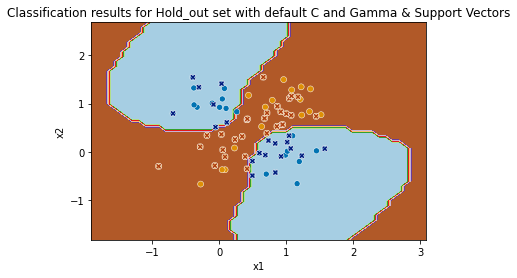

In [168]:
#Duplicating the holdOut dataframe to be modified below
df_holdOut_modify = df_holdOut

#Adding the classification-values for the holdOut set in a new dataframe, for scatterplot
for i in range(80):
    df_holdOut_modify['y'][i] = y_pred_holdOut[i] 

# get indices of support vectors
support_vectors_indices_trainSet = rbf_svc_trainSet.support_

support_vectors_Set = []

#Appending the support vectors to an array, to be added to a dataframe for plotting
for indx,value in enumerate(support_vectors_indices_trainSet):
    support_vectors_Set = np.append(support_vectors_Set, df_holdOut['x1'][value])
    support_vectors_Set = np.append(support_vectors_Set, df_holdOut['x2'][value])
    support_vectors_Set = np.append(support_vectors_Set, df_holdOut['y'][value])
support_vectors_Set = np.reshape(support_vectors_Set, (len(support_vectors_indices_trainSet),3))

data_support_vectors_Set = {'x1': support_vectors_Set[:,0],'x2': support_vectors_Set[:,1], 'y':support_vectors_Set[:,2]}
df_support_vectors_Set = pd.DataFrame(data_support_vectors_Set)  

decisionBoundry(X,y)

#plotting the classification results, as well as the support-vectors for HoldOut set
sns.scatterplot(x ='x1', y= 'x2', data=df_holdOut_modify, hue='y', marker="o", palette='colorblind',legend = False)
sns.scatterplot(x ='x1', y= 'x2', data=df_support_vectors_Set, hue='y', marker="X", palette='dark',legend = False)
plt.title("Classification results for Hold_out set with default C and Gamma & Support Vectors")
plt.show()

# Exercise H9.3: C-SVM parameter optimization

C: 4, Gamma: 2, Best Cross-Validation Performance: 0.85


Text(0.5, 1.0, 'Cross-Validation Performance')

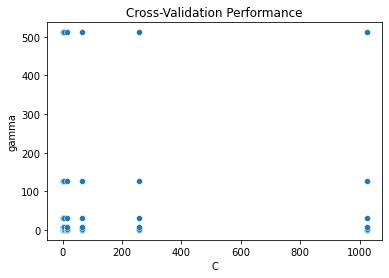

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

param_C_G_score = []

XX = np.asarray(df_train[['x1','x2']])
yy = np.ravel(np.asarray(df_train[['y']]))

parameters = [{
'kernel': ['rbf'], 
'C': [2**-6, 2**-4, 2**-2, 2**0, 2**2, 2**4, 2**6, 2**8, 2**10],
'gamma': [2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5, 2**7, 2**9],
                }]

classifier = GridSearchCV(SVC(), parameters, scoring='accuracy', cv=10)
cross_valid_params = classifier.fit(XX, yy)

df_CV_params_results = pd.DataFrame(cross_valid_params.cv_results_)

#printing out the best parameter values (C,Gamma) and the corresponding Cross-Validation Performance score 
arg = np.argmax(df_CV_params_results["mean_test_score"])
print("C: {}, Gamma: {}, Best Cross-Validation Performance: {}".format(df_CV_params_results["params"][arg]["C"],
        df_CV_params_results["params"][arg]["gamma"], df_CV_params_results["mean_test_score"][arg]))

#appending the values of C, Gamma and mean_test_scores to an array
for i in range(72):
    param_C_G_score = np.append(param_C_G_score, df_CV_params_results["params"][i]["C"])
    param_C_G_score = np.append(param_C_G_score, df_CV_params_results["params"][i]["gamma"])
    param_C_G_score = np.append(param_C_G_score, df_CV_params_results["mean_test_score"][i])

#reshaping the array and naming the columns.
param_C_G_score = np.reshape(param_C_G_score, (72,3))
data_C_G_score = {'C': param_C_G_score[:,0],'gamma': param_C_G_score[:,1], 'score':param_C_G_score[:,2]}

#Creating a dataframe and adding the sorted data above
df_C_G_score = pd.DataFrame(data_C_G_score)

#plotting the mean_test_scores for each set of C and Gamma
sns.scatterplot(x ='C', y= 'gamma', data=df_C_G_score, palette='colorblind')
plt.title("Cross-Validation Performance")

In [170]:
X_holdOut = np.asarray(df_holdOut[['x1','x2']])
y_true_cG_holdOut = np.ravel(np.asarray(df_holdOut[['y']]))

#Training the SVM on entire training data using the best C and Gamma values produced above
rbf_svc_cG_holdOut = svm.SVC(kernel='rbf', C=classifier.best_params_['C'], gamma=classifier.best_params_['gamma'])
rbf_svc_cG_holdOut.fit(XX, yy)

#Classification done on Hold_out set
y_pred_cG_holdOut = rbf_svc_cG_holdOut.predict(X_holdOut)

#Number of support vectors for each class
support_vectors_count_cG_holdOut = rbf_svc_cG_holdOut.n_support_
print("Number of Support Vectors: ", support_vectors_count_cG_holdOut)

classification_perf_cG_holdOut = percentSuccessAccuracy(y_true_cG_holdOut, y_pred_cG_holdOut)
print("Percentage of Classification Accuracy on HoldOut set with best C and Gamma Values: {}%".format(classification_perf_cG_holdOut))

Number of Support Vectors:  [20 18]
Percentage of Classification Accuracy on HoldOut set with best C and Gamma Values: 95.0%


## Plotting training patterns

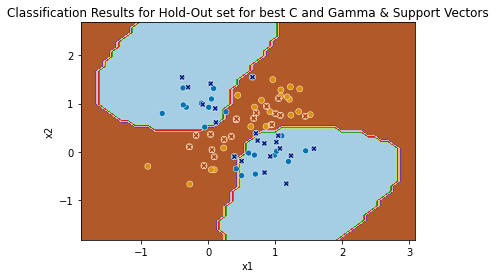

In [171]:
#Duplicating the holdOut dataframe to be modified below
df_holdOut_modify_cG = df_holdOut

#Adding the classification-values for the holdOut set in a new dataframe, for scatterplot
for i in range(80):
    df_holdOut_modify_cG['y'][i] = y_pred_cG_holdOut[i] 

# get indices of support vectors
support_vectors_indices_cG_holdOut = rbf_svc_cG_holdOut.support_

support_vectors_Set_cG = []

#Appending the support vectors to an array, to be added to a dataframe for plotting
for indx,value in enumerate(support_vectors_indices_cG_holdOut):
    support_vectors_Set_cG = np.append(support_vectors_Set_cG, df_holdOut['x1'][value])
    support_vectors_Set_cG = np.append(support_vectors_Set_cG, df_holdOut['x2'][value])
    support_vectors_Set_cG = np.append(support_vectors_Set_cG, df_holdOut['y'][value])
support_vectors_Set_cG = np.reshape(support_vectors_Set_cG, (len(support_vectors_indices_cG_holdOut),3))

data_support_vectors_Set_cG = {'x1': support_vectors_Set_cG[:,0],'x2': support_vectors_Set_cG[:,1],
                               'y':support_vectors_Set_cG[:,2]}
df_support_vectors_Set_cG = pd.DataFrame(data_support_vectors_Set_cG)      

decisionBoundry(XX,yy)

#plotting the classification results, as well as the support-vectors for HoldOut set
sns.scatterplot(x ='x1', y= 'x2', data=df_holdOut_modify_cG, hue='y', marker="o", palette='colorblind',legend = False)
sns.scatterplot(x ='x1', y= 'x2', data=df_support_vectors_Set_cG, hue='y', marker="X", palette='dark',legend = False)
plt.title("Classification Results for Hold-Out set for best C and Gamma & Support Vectors")
plt.show()

## Comparing the Classification performance and the number of support vectors for Hold_out set with default and best C and Gamma values

In [172]:
#Number of Support Vectors for the Hold-Out data with default C and Gamma values
support_vectors_count_trainSet = rbf_svc_trainSet.n_support_
print("Number of Support Vectors for the Hold-Out data with default C and Gamma values: ",support_vectors_count_trainSet)

#Classification performance for the Hold-Out data with default C and Gamma values
classification_perf_holdOut_s = percentSuccessAccuracy(y_true_holdOut, y_pred_holdOut)
print("Classification performance for the Hold-Out data with default C and Gamma values: {}%"
      .format(classification_perf_holdOut_s))

# Number of Support Vectors for the Hold-Out data with best C and Gamma values
support_vectors_count_cG_holdOut = rbf_svc_cG_holdOut.n_support_
print("Number of Support Vectors for the Hold-Out data with best C and Gamma value: ", support_vectors_count_cG_holdOut)

#Classification performance for the Hold-Out data with best C and Gamma values
classification_perf_cG_holdOut = percentSuccessAccuracy(y_true_cG_holdOut, y_pred_cG_holdOut)
print("Classification performance for the Hold-Out data with best C and Gamma values: {}%"
      .format(classification_perf_cG_holdOut))

Number of Support Vectors for the Hold-Out data with default C and Gamma values:  [23 25]
Classification performance for the Hold-Out data with default C and Gamma values: 90.0%
Number of Support Vectors for the Hold-Out data with best C and Gamma value:  [20 18]
Classification performance for the Hold-Out data with best C and Gamma values: 95.0%


## Impact of dividing C or Gamma by 4

Number of Support Vectors:  [23 22]
Percentage of Classification Accuracy on HoldOut set with best Gamma value and dividing the best C value by 4: 95.0%


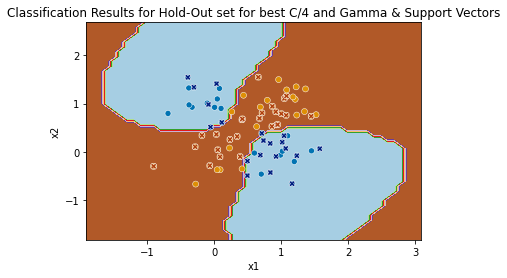

In [173]:
XX = np.asarray(df_train[['x1','x2']])
yy = np.ravel(np.asarray(df_train[['y']]))
X_holdOut = np.asarray(df_holdOut[['x1','x2']])
y_true_cG_holdOut = np.ravel(np.asarray(df_holdOut[['y']]))

#Training the SVM on entire training data using the best Gamma value and dividing the best C value by 4
rbf_svc_cG_holdOut = svm.SVC(kernel='rbf', C=classifier.best_params_['C']/4, gamma=classifier.best_params_['gamma'])
rbf_svc_cG_holdOut.fit(XX, yy)

#Classification done on Hold_out set
y_pred_cG_holdOut = rbf_svc_cG_holdOut.predict(X_holdOut)

# get support vectors
support_vectors_cG_holdOut = rbf_svc_cG_holdOut.support_vectors_

#Number of support vectors for each class
support_vectors_count_cG_holdOut = rbf_svc_cG_holdOut.n_support_
print("Number of Support Vectors: ", support_vectors_count_cG_holdOut)

classification_perf_cG_holdOut = percentSuccessAccuracy(y_true_cG_holdOut, y_pred_cG_holdOut)
print("Percentage of Classification Accuracy on HoldOut set with best Gamma value and dividing the best C value by 4: {}%"
      .format(classification_perf_cG_holdOut))

# PLOTTING

#Duplicating the holdOut dataframe to be modified below
df_holdOut_modify_cby4G = df_holdOut

#Adding the classification-values for the holdOut set in a new dataframe, for scatterplot
for i in range(80):
    df_holdOut_modify_cby4G['y'][i] = y_pred_cG_holdOut[i] 

# get indices of support vectors
support_vectors_indices_cby4G_holdOut = rbf_svc_cG_holdOut.support_

support_vectors_Set_cby4G = []

#Appending the support vectors to an array, to be added to a dataframe for plotting
for indx,value in enumerate(support_vectors_indices_cby4G_holdOut):
    support_vectors_Set_cby4G = np.append(support_vectors_Set_cby4G, df_holdOut['x1'][value])
    support_vectors_Set_cby4G = np.append(support_vectors_Set_cby4G, df_holdOut['x2'][value])
    support_vectors_Set_cby4G = np.append(support_vectors_Set_cby4G, df_holdOut['y'][value])
support_vectors_Set_cby4G = np.reshape(support_vectors_Set_cby4G, (len(support_vectors_indices_cby4G_holdOut),3))

data_support_vectors_Set_cby4G = {'x1': support_vectors_Set_cby4G[:,0],'x2': support_vectors_Set_cby4G[:,1],
                                  'y':support_vectors_Set_cby4G[:,2]}
df_support_vectors_Set_cby4G = pd.DataFrame(data_support_vectors_Set_cby4G) 

decisionBoundry(XX,yy)

#plotting the classification results, as well as the support-vectors for HoldOut set
sns.scatterplot(x ='x1', y= 'x2', data=df_holdOut_modify_cby4G, hue='y', marker="o", palette='colorblind',legend = False)
sns.scatterplot(x ='x1', y= 'x2', data=df_support_vectors_Set_cby4G, hue='y', marker="X", palette='dark',legend = False)
plt.title("Classification Results for Hold-Out set for best C/4 and Gamma & Support Vectors")
plt.show()

Number of Support Vectors:  [20 21]
Percentage of Classification Accuracy on HoldOut set with best C value and dividing the best gamma value by 4: 96.25%


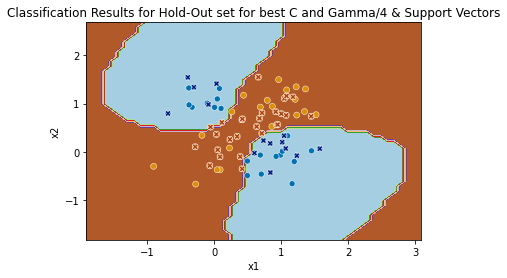

In [174]:
XX = np.asarray(df_train[['x1','x2']])
yy = np.ravel(np.asarray(df_train[['y']]))
X_holdOut = np.asarray(df_holdOut[['x1','x2']])
y_true_cG_holdOut = np.ravel(np.asarray(df_holdOut[['y']]))

#Training the SVM on entire training data using the best C value and dividing the best gamma value by 4
rbf_svc_cG_holdOut = svm.SVC(kernel='rbf', C=classifier.best_params_['C'], gamma=classifier.best_params_['gamma']/4)
rbf_svc_cG_holdOut.fit(XX, yy)

#Classification done on Hold_out set
y_pred_cG_holdOut = rbf_svc_cG_holdOut.predict(X_holdOut)

# get support vectors
support_vectors_cG_holdOut = rbf_svc_cG_holdOut.support_vectors_

#Number of support vectors for each class
support_vectors_count_cG_holdOut = rbf_svc_cG_holdOut.n_support_
print("Number of Support Vectors: ", support_vectors_count_cG_holdOut)

classification_perf_cG_holdOut = percentSuccessAccuracy(y_true_cG_holdOut, y_pred_cG_holdOut)
print("Percentage of Classification Accuracy on HoldOut set with best C value and dividing the best gamma value by 4: {}%"
      .format(classification_perf_cG_holdOut))

# PLOTTING

#Duplicating the holdOut dataframe to be modified below
df_holdOut_modify_cGby4 = df_holdOut

#Adding the classification-values for the holdOut set in a new dataframe, for scatterplot
for i in range(80):
    df_holdOut_modify_cGby4['y'][i] = y_pred_cG_holdOut[i] 

# get indices of support vectors
support_vectors_indices_cGby4_holdOut = rbf_svc_cG_holdOut.support_

support_vectors_Set_cGby4 = []

#Appending the support vectors to an array, to be added to a dataframe for plotting
for indx,value in enumerate(support_vectors_indices_cGby4_holdOut):
    support_vectors_Set_cGby4 = np.append(support_vectors_Set_cGby4, df_holdOut['x1'][value])
    support_vectors_Set_cGby4 = np.append(support_vectors_Set_cGby4, df_holdOut['x2'][value])
    support_vectors_Set_cGby4 = np.append(support_vectors_Set_cGby4, df_holdOut['y'][value])
support_vectors_Set_cGby4 = np.reshape(support_vectors_Set_cGby4, (len(support_vectors_indices_cGby4_holdOut),3))

data_support_vectors_Set_cGby4 = {'x1': support_vectors_Set_cGby4[:,0],'x2': support_vectors_Set_cGby4[:,1],
                                  'y':support_vectors_Set_cGby4[:,2]}
df_support_vectors_Set_cGby4 = pd.DataFrame(data_support_vectors_Set_cGby4)      

decisionBoundry(XX,yy)

#plotting the classification results, as well as the support-vectors for HoldOut set
sns.scatterplot(x ='x1', y= 'x2', data=df_holdOut_modify_cGby4, hue='y', marker="o", palette='colorblind',legend = False)
sns.scatterplot(x ='x1', y= 'x2', data=df_support_vectors_Set_cGby4, hue='y', marker="X", palette='dark',legend = False)
plt.title("Classification Results for Hold-Out set for best C and Gamma/4 & Support Vectors")
plt.show()